# Prepare data

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

def imShowCv(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(10, 5)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [3]:
with open('label/ver1_json_format/json.json') as f:
    dataTrain = json.load(f)
# with open('digitStructExtra.json') as f:
#     dataExtra = json.load(f)
with open('label/ver1_json_format/digitStructTest.json') as f:
    dataTest = json.load(f)

In [4]:
    
print(dataTrain[0])

for i in range(len(dataTrain)):
    dataTrain[i]['filename']='data/SVHN_train/'+dataTrain[i]['filename']
    
for i in range(len(dataTest)):
    dataTest[i]['filename']='data/SVHN_test/'+dataTest[i]['filename']

{'filename': '1.png', 'boxes': [{'height': 219.0, 'label': 1.0, 'left': 246.0, 'top': 77.0, 'width': 81.0}, {'height': 219.0, 'label': 9.0, 'left': 323.0, 'top': 81.0, 'width': 96.0}]}


In [5]:
print(dataTrain[0])
print(dataTest[0])

{'filename': 'data/SVHN_train/1.png', 'boxes': [{'height': 219.0, 'label': 1.0, 'left': 246.0, 'top': 77.0, 'width': 81.0}, {'height': 219.0, 'label': 9.0, 'left': 323.0, 'top': 81.0, 'width': 96.0}]}
{'filename': 'data/SVHN_test/1.png', 'boxes': [{'height': 30.0, 'label': 5.0, 'left': 43.0, 'top': 7.0, 'width': 19.0}]}


In [6]:
import os
print(len(os.listdir('data/SVHN_train')))
print(len(os.listdir('data/SVHN_test')))

33404
13070


In [7]:

n=0

for dataEntry in dataTrain:
  if len(dataEntry['boxes'])==7:
    n+=1

print(n)
  

0


In [8]:
dataList = dataTrain

33402
{'filename': 'data/SVHN_train/1.png', 'boxes': [{'height': 219.0, 'label': 1.0, 'left': 246.0, 'top': 77.0, 'width': 81.0}, {'height': 219.0, 'label': 9.0, 'left': 323.0, 'top': 81.0, 'width': 96.0}]}
{'height': 219.0, 'label': 1.0, 'left': 246.0, 'top': 77.0, 'width': 81.0}
(35, 30)
{'height': 219.0, 'label': 9.0, 'left': 323.0, 'top': 81.0, 'width': 96.0}
(35, 30)


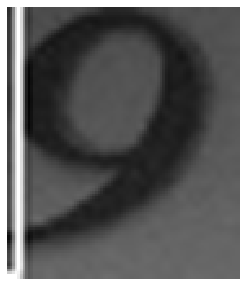

In [9]:
import cv2

print(len(dataList))


item = dataList[0]


print(item)

image = cv2.imread(item['filename'])
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)






for box in item['boxes']:
  print(box)
  
  left = int(box['left'])
  top = int(box['top'])
  right = int(box['left'] + box['width'])
  bottom = int(box['top'] + box['height'])
  
  label = int(box['label'])
  img = image[top:bottom,left:right]
  img = cv2.resize(img,(30,35))
  print(img.shape)
  #IF LABEL = 10, CHANGE IT TO ZERO
  if label == 10:
    label = 0
  
  imShowCv(img)
  
  cv2.putText(image,str(label),  (left, top), cv2.FONT_HERSHEY_SIMPLEX, 1,(255, 0, 255), 1)
  cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 255), 2)
  
  
  
# imShowCv(image)

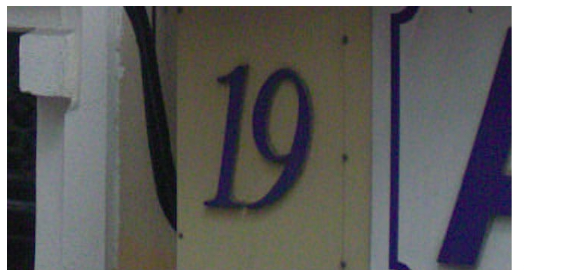

In [10]:
image = cv2.imread(item['filename'])
imShowCv(image)

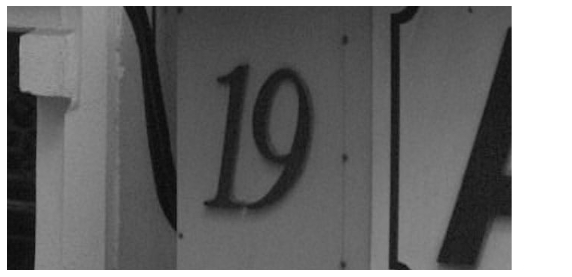

In [11]:
image = cv2.imread(dataTrain[0]['filename'])
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
imShowCv(image)

In [12]:
image_train_tensor =[]
label_train_tensor = []
n = 0
for i in range(len(dataTrain)):
    image = cv2.imread(dataTrain[i]['filename'])
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    for box in dataTrain[i]['boxes']:
        left = int(box['left'])
        top = int(box['top'])
        right = int(box['left'] + box['width'])
        bottom = int(box['top'] + box['height'])
        img = image[top:bottom,left:right]
#         print(img.shape)
        try:
            img = cv2.resize(img,(30,45))
            label = int(box['label'])
          
  #IF LABEL = 10, CHANGE IT TO ZERO
            if label == 10:
                label = 0
            image_train_tensor.append(img)
            label_train_tensor.append(label)
            
        except:
            print(n)
    n+=1
        
    

251
723
3099
5311
6876
9356
11860
13144
15124
18276
18392
19382
20539
20900
20914
22441
23904
26569
27637
27808
28512
28797
28817
28849
29758
30509
30952
32168
32431


In [13]:
image_test_tensor =[]
label_test_tensor = []
n = 0
for i in range(len(dataTest)):
    image = cv2.imread(dataTest[i]['filename'])
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    for box in dataTest[i]['boxes']:
        left = int(box['left'])
        top = int(box['top'])
        right = int(box['left'] + box['width'])
        bottom = int(box['top'] + box['height'])
        img = image[top:bottom,left:right]
#         print(img.shape)
        try:
            img = cv2.resize(img,(30,45))
            label = int(box['label'])
          
  #IF LABEL = 10, CHANGE IT TO ZERO
            if label == 10:
                label = 0
            image_test_tensor.append(img)
            label_test_tensor.append(label)
            
        except:
            print(n)
    n+=1

343
438
520
2612
5259
7635
8884
12433


In [86]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(image_tensor, label_tensor, test_size=0.2, random_state=1)

# Use model 1 and 2

# Model 1

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
     activation='relu',padding = 'same',
     input_shape=(45, 30, 1)))
model.add(Conv2D(32, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Model 2

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
     activation='relu',padding = 'same',
     input_shape=(60, 30, 1)))
model.add(Conv2D(64, (3, 3), padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding = 'valid',activation='relu'))


model.add(Conv2D(128, (3, 3), padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Model 3

In [44]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input, BatchNormalization



model_input = Input(shape=(60, 32, 1))
x = BatchNormalization()(model_input)
        
x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
x = MaxPooling2D(pool_size=(2, 2))(x) 
    
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)    
x = Dropout(0.25)(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)       
x = Conv2D(64, (3, 3), activation='relu')(x)    
x = Dropout(0.25)(x)
    
x = Conv2D(196, (3, 3), activation='relu')(x)    
x = Dropout(0.25)(x)
              
x = Flatten()(x)
    
x = Dense(512, activation='relu')(x)    
x = Dropout(0.5)(x)
    
y = Dense(10, activation='softmax')(x)

    
model = Model(input=model_input, output=y)


F:\computer vision\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


# Model 4

In [15]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Input
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
input = Input(shape=(45, 30, 1), name = 'image_input')
output_vgg16_conv = model_vgg16_conv(input)
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(input=input, output=x)


W1230 20:29:57.034368 10816 deprecation_wrapper.py:119] From F:\computer vision\anaconda\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



 1695744/58889256 [..............................] - ETA: 35:46

KeyboardInterrupt: 

# Compress data for faster training (not important)

In [ ]:
import numpy as np
x_train = np.array(image_train_tensor)/255
x_test = np.array(image_test_tensor)/255
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_test = x_test[:20000]

In [ ]:
x_train = np.expand_dims(x_train,-1)
x_train.shape

In [ ]:
x_test = np.expand_dims(x_test,-1)

In [ ]:
y_train = np.array(label_train_tensor)
y_test = np.array(label_test_tensor)[:20000]

In [ ]:
import keras

In [ ]:
y_train_ohe = keras.utils.to_categorical(y_train,10)
y_test_ohe = keras.utils.to_categorical(y_test,10)

In [ ]:
y_train_ohe.shape

In [26]:
from numpy import save
save('X_train.npy', x_train)
save('X_test.npy', x_test)
save('y_train.npy', y_train)
save('y_test.npy', y_test)

In [49]:
# import tensorflow as tf
# from keras.callbacks import ModelCheckpoint
# filepath="model2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.compile(loss='categorical_crossentropy',
      optimizer=tf.train.AdamOptimizer(0.0004),
      metrics=['accuracy'])
batch_size = 128
epochs = 10

model.fit(x_train, y_train_ohe,
          batch_size=batch_size,
          epochs=epochs,
          validation_data = (x_test,y_test_ohe),
         callbacks = [checkpoint]
          )

Train on 73228 samples, validate on 20000 samples
Epoch 1/10
73228/73228 [==============================] - 60s 813us/step - loss: 0.1526 - accuracy: 0.9528 - val_loss: 0.2575 - val_accuracy: 0.9317

Epoch 00001: val_accuracy improved from -inf to 0.93175, saving model to model2.h5
Epoch 2/10
  128/73228 [..............................] - ETA: 56s - loss: 0.1116 - accuracy: 0.9453

F:\computer vision\anaconda\anaconda\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


73228/73228 [==============================] - 60s 819us/step - loss: 0.1489 - accuracy: 0.9535 - val_loss: 0.2441 - val_accuracy: 0.9370

Epoch 00002: val_accuracy improved from 0.93175 to 0.93695, saving model to model2.h5
Epoch 3/10
73228/73228 [==============================] - 61s 834us/step - loss: 0.1484 - accuracy: 0.9537 - val_loss: 0.2471 - val_accuracy: 0.9361

Epoch 00003: val_accuracy did not improve from 0.93695
Epoch 4/10
73228/73228 [==============================] - 64s 870us/step - loss: 0.1422 - accuracy: 0.9547 - val_loss: 0.2423 - val_accuracy: 0.9370

Epoch 00004: val_accuracy did not improve from 0.93695
Epoch 5/10
73228/73228 [==============================] - 60s 821us/step - loss: 0.1396 - accuracy: 0.9561 - val_loss: 0.2550 - val_accuracy: 0.9381

Epoch 00005: val_accuracy improved from 0.93695 to 0.93815, saving model to model2.h5
Epoch 6/10
73228/73228 [==============================] - 62s 849us/step - loss: 0.1375 - accuracy: 0.9559 - val_loss: 0.2674 - v

In [2]:
from keras.models import load_model
model = load_model('model2.h5')

/home/huuthieu/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Augmentation

In [40]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator()
BS = 32
EPOCHS = 10
aug = ImageDataGenerator(rotation_range=30,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
fill_mode="nearest")

In [41]:
import tensorflow as tf
mcp = ModelCheckpoint('my_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    
#     # Compile model
model.compile(optimizer=tf.train.AdamOptimizer(0.0001), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    

In [42]:
model.fit_generator(aug.flow(x_train,y_train_ohe, batch_size=BS),validation_data=(x_test, y_test_ohe),steps_per_epoch=len(x_train) // BS,
epochs=EPOCHS, callbacks = [mcp])

Epoch 1/10
2288/2288 [==============================] - 167s 73ms/step - loss: 1.1122 - accuracy: 0.6828 - val_loss: 0.2868 - val_accuracy: 0.9208

Epoch 00001: val_accuracy improved from -inf to 0.92080, saving model to my_model.h5
Epoch 2/10
   2/2288 [..............................] - ETA: 2:49 - loss: 0.8069 - accuracy: 0.7656

F:\computer vision\anaconda\anaconda\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


2288/2288 [==============================] - 151s 66ms/step - loss: 0.8572 - accuracy: 0.7352 - val_loss: 0.2876 - val_accuracy: 0.9193

Epoch 00002: val_accuracy did not improve from 0.92080
Epoch 3/10
2288/2288 [==============================] - 125s 55ms/step - loss: 0.7756 - accuracy: 0.7589 - val_loss: 0.2893 - val_accuracy: 0.9180

Epoch 00003: val_accuracy did not improve from 0.92080
Epoch 4/10
2288/2288 [==============================] - 154s 67ms/step - loss: 0.7197 - accuracy: 0.7756 - val_loss: 0.2806 - val_accuracy: 0.9208

Epoch 00004: val_accuracy did not improve from 0.92080
Epoch 5/10
2288/2288 [==============================] - 185s 81ms/step - loss: 0.6802 - accuracy: 0.7889 - val_loss: 0.2772 - val_accuracy: 0.9225

Epoch 00005: val_accuracy improved from 0.92080 to 0.92250, saving model to my_model.h5
Epoch 6/10
2288/2288 [==============================] - 157s 69ms/step - loss: 0.6520 - accuracy: 0.7984 - val_loss: 0.2800 - val_accuracy: 0.9223

Epoch 00006: val_a

In [95]:
model.save('model.h5')

In [81]:
img = cv2.imread('data/SVHN_train/1.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [82]:
img = img[77:77+219,246:246+81]
img = cv2.resize(img,(30,35))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

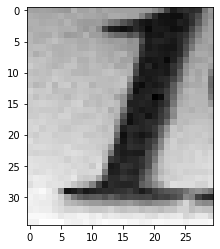

In [83]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap = 'gray')

In [32]:
# model = load_model('recognize_model.hdf5')
model = load_model('model.h5')

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 60, 30, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 7, 64)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 7, 128)        73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 3, 128)        

In [64]:
model1.layers[0].get_config()

{'name': 'convolution2d_1',
 'trainable': True,
 'batch_input_shape': (None, 32, 32, 1),
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'linear',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [62]:
model1 = model
model1.layers[0] = Conv2D(16, kernel_size=(3, 3),
     activation='relu',padding = 'same',
     input_shape=(60, 30, 1))

In [99]:
img = cv2.resize(img,(30,60))
img = np.reshape(img,(1,img.shape[0],img.shape[1],1))/255

In [100]:
np.argmax(model.predict(img))

1

In [78]:
img = cv2.imread('crop.jpg')

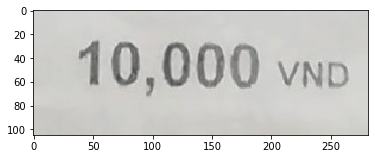

In [79]:
plt.imshow(img)

In [80]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [81]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [90]:
import time
start = time.time()
rois = []
max_h = np.max([cv2.boundingRect(cnt)[3] for cnt in contours])
for i,cnt in enumerate(contours):
#     epsilon = 0.01*cv2.arcLength(cnt,True)
#     approx = cv2.approxPolyDP(cnt,epsilon,True)
        
#     hull = cv2.convexHull(cnt)
#     k = cv2.isContourConvex(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2) 
    if(hierarchy[0][i][3] == -1 and w>10 and h>10 and h > 0.8*max_h):
            #putting boundary on each digit
#         print(cv2.contourArea(cnt))
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi = gray[y:y+h, x-5:x+w+5]
        roi = cv2.bitwise_not(roi)
        rois.append(roi)
print(time.time()-start)
#     else:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
   
#     rois.append(roi)
#     roi = image_refiner(roi)
#     th,fnl = cv2.threshold(roi,127,255,cv2.THRESH_BINARY)

0.001995086669921875


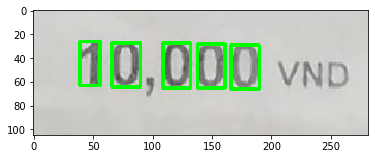

In [83]:
plt.imshow(img,cmap = 'gray')

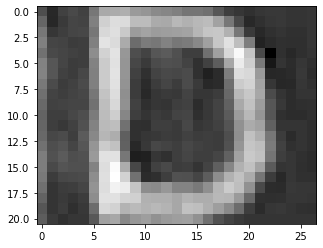

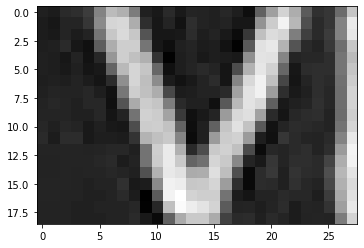

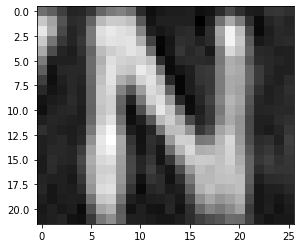

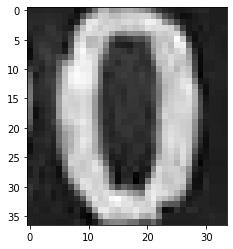

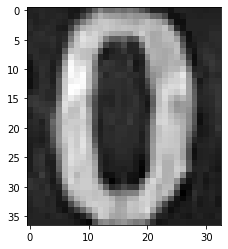

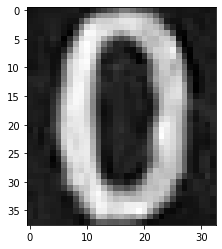

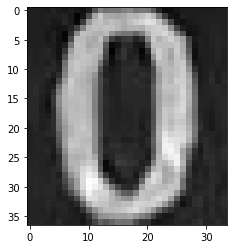

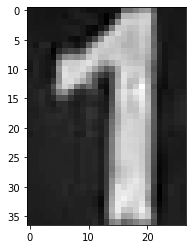

In [117]:
for roi in rois:
    plt.imshow(roi,cmap = 'gray')
    plt.show()

In [139]:
img = cv2.resize(rois[-5],(30,35))
img = np.expand_dims(img,0)
img = np.expand_dims(img,-1)

In [55]:
shape = np.zeros(2)
for roi in rois[3:]:
    shape += roi.shape
print(shape/len(rois))

[23.25  20.125]


In [140]:
img = img/255
pred = model.predict(img)
pred

array([[1.0000000e+00, 1.0412287e-15, 3.8646269e-20, 6.1024519e-27,
        9.2680112e-25, 2.3459022e-35, 1.6142072e-22, 2.8128386e-24,
        6.5762926e-25, 1.2275266e-16]], dtype=float32)

In [141]:
np.argmax(pred)

0

In [127]:
a = [1,2,3]
b = [3]
a+b

[1, 2, 3, 3]

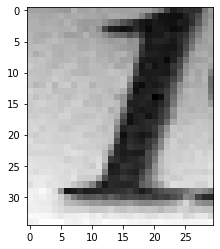

In [143]:
plt.imshow(image_train_tensor[0],cmap = 'gray')